# 1. Programming Gradient Descent in 1D

#### Exercise 1:

Improve the `gradient_descent` functions by adding:

* *a tolerance and a maximum number of iterations*: stop the iterations only when `Df(x)` is smaller than the tolerance or the maximum number of iterations has been reached.
* *progress info*: print the current number of iterations, the value of `x` and that of `f(x)` every 100 iterations (*Hint*: in the second code cell you can see how to format variables into text) 
* *a `verbose` parameter*, to activate or deactivate the showing of progress info.

#### Solution

In [ ]:
""" Third version of the gradient descent. Stops when the gradient is smaller than `TOL`, 
    or when the maximum number of iterations `maxiter` has been reached"""
function gradient_descent(f, Df, x; α = 0.1, TOL = 1e-10, maxiter = 1000, verbose = false)
    
    N_iter = 0
    grad = Df(x)
    while (N_iter < maxiter) & (abs(grad) > TOL)
        x = x - α*grad
        grad = Df(x)
        N_iter += 1
        
        if (N_iter % 100 == 0) & (verbose == true) # print progress
            fx = f(x)
            println("Iter. $N_iter,\tx = $x,\tf(x) = $fx")
        end
    end
    
    return (x, f(x))
end

# 2. Arrays, packages and Multidimensional Gradient Descent

#### Exercise 2

Build the function $g(x) = x_1^2 + 2x_2^2$ and its gradient using only matrix and scalar-matrix operations (Hint: the transpose of the vector `x` is `x'`).

#### Solution

In [ ]:
g2(x) = x' * [1 0; 0 2] * x
Dg2(x) = 2 .* [1 0; 0 2] * x

#### Exercise 3

Bring the gradient descent of the first notebook into the multidimensional realm, and make it output the _history_ of `x`s and `f(x)`s (Hint: consider using the concatenate functions that were explained above. You may also use `push!`.)

In [ ]:
""" Gradient descent for multidimensional functions Stops when the gradient is smaller than `TOL`, 
    or when the maximum number of iterations `maxiter` has been reached"""
function gradient_descent(f, Df, x; α = 0.1, TOL = 1e-10, maxiter = 1000, verbose = false)
    N_iter = 0
    grad = Df(x)
    
    xn = x
    fn = [f(x)]
    while (N_iter < maxiter) & (norm(grad) > TOL)
        x = x - α*grad
        
        xn = [xn x]
        fn = [fn f(x)]
        
        grad = Df(x)
        N_iter += 1
        
        if (N_iter % 100 == 0) & (verbose == true)# print progress
            fx = fn[end]
            println("Iter. $N_iter,\tx = $x,\tf(x) = $fx")
        end
    end
    
    return (xn', fn')
end

# 4. Dataframes and checking Julia performance

#### Exercise 4

Create a function `game_it(A)` that given the current state of the game `A` returns the status of the grid in the next iteration.

In [ ]:
""" Game of Life iteration for the periodic boundary condition case"""
function my_game_it(A)
    M, N = size(A)
    j_l = j_r = 1
    i_u = i_d = 1
    B = zeros(Int64, M, N)
    for j in 1:N
        j == 1 ? j_l = N : j_l = j-1
        j == N ? j_r = 1 : j_r = j+1

        for i in 1:M
            i == 1 ? i_u = M : i_u = i-1
            i == M ? i_d = 1 : i_d = i+1

            sum_neigh = A[i_u,j_l] + A[i_u,j] + A[i_u,j_r] + A[i,j_l] + A[i,j_r] + A[i_d,j_l] + A[i_d,j] + A[i_d,j_r]
            if sum_neigh == 3 || (sum_neigh == 2 && A[i,j] == 1)
                B[i,j] = 1
            end
        end
    end
    return B
end

""" Game of Life iteration for the zero boundary condition case"""
function my_game_it(A)
    M, N = size(A)
    B = zeros(Int64, M, N)
    for j in 2:N-1
        for i in 2:M-1
            sum_neigh = A[i-1,j-1] + A[i-1,j] + A[i-1,j+1] + A[i,j-1] + A[i,j+1] + A[i+1,j-1] + A[i+1,j] + A[i+1,j+1]
            if sum_neigh == 3 || (sum_neigh == 2 && A[i,j] == 1)
                B[i,j] = 1
            end
        end
    end
    return B
end

#### Exercise 5

Join the results files in `benchmark/*.csv` into a single DataFrame, plot them and save it to `benchmark\benchmark.csv`. 

In [4]:
using CSV, DataFrames, Plots

# Joining and saving

df1 = CSV.read("benchmark/results_julia.csv")
df2 = CSV.read("benchmark/results_python.csv")
df3 = CSV.read("benchmark/results_matlab.csv",header=["N", "seconds"])

df = DataFrame()
df.N = df1.N
df.seconds_julia  = df1.seconds
df.seconds_python = df2.seconds
df.seconds_matlab = df3.seconds
CSV.write("benchmark/benchmark.csv",df)
df

,N,seconds_julia,seconds_python,seconds_matlab
,Float64,Float64,Float64,Float64
1,4.0,1.39556e-7,6.62096e-5,7.3475e-6
2,8.0,3.81148e-7,0.000231959,9.0627e-6
3,16.0,1.7686e-6,0.000855603,1.05147e-5
4,32.0,5.98807e-6,0.00371517,2.4045e-5
5,64.0,3.13356e-5,0.0143423,0.000110227
6,128.0,0.000164442,0.0582013,0.000479688
7,256.0,0.000676298,0.259562,0.00210886
8,512.0,0.00259142,1.03869,0.00850738
9,1024.0,0.00998135,4.14493,0.033852


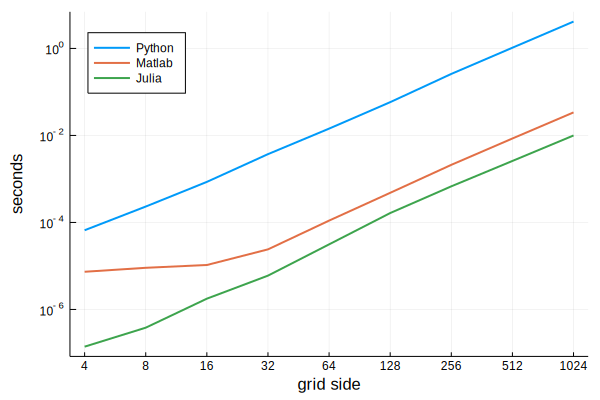

In [3]:
# Reading and plotting
df = CSV.read("benchmark/benchmark.csv")
default(linewidth=2)
plot(legend=:topleft,grid=true,xscale=:log10,yscale=:log10) # Some default parameters for plotting
plot!(df.N, df.seconds_python,label="Python",ylabel="seconds",xlabel="grid side")
plot!(df.N, df.seconds_matlab,label="Matlab")
plot!(df.N, df.seconds_julia,label="Julia")
xticks!(2 .^(2:10),["$(2^i)" for i in 2:10])